In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os 
import numpy as np
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from methods_audio import data_handling
from methods_audio import data_augmentation
from methods_audio import denoising 
from models import get_model
from methods_audio import model_performance_training
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


/Users/rosameliacarioni/miniconda3/envs/bach_thesis_4/lib/python3.9/site-packages/tensorflow_io-0.32.0-py3.9-macosx-11.0-arm64.egg/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/rosameliacarioni/miniconda3/envs/bach_thesis_4/lib/python3.9/site-packages/tensorflow_io-0.32.0-py3.9-macosx-11.0-arm64.egg/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/Users/rosameliacarioni/miniconda3/envs/bach_thesis_4/lib/python3.9/site-packages/tensorflow_io-0.32.0-py3.9-macosx-11.0-arm64.egg/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/Users/rosameliacarioni/miniconda3/envs/bach_thesis_4/lib/python3.9/site-packages/tensorflow_io-0.32.0-py3.9-macosx-11.0-arm64.egg/tensorflow_io/python/ops/__init__.py:104: UserWarning

# This code is used to obtain the results on acc, prec, recall, TP, FP, TN and FN on the different models and pre-processing techniques, from the test data provided by ELP. 

1. Get data

In [2]:
test_data = data_handling.get_test_data()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2. Read data (transforming file names into waves)

In [3]:
data = test_data.map(data_handling.read_in_data) 

In [4]:
samples, labels = data_handling.extract_samples_labels(data)

2023-05-31 07:36:27.430883: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3. Set type of denoising and data transformation

In [18]:
type_denoising= 'low_pass' #spectral_gating, low_pass
type_transformation = 'mfcc_delta' #mfcc_delta, mfcc 


4. Denoise data 

In [19]:
if (type_denoising == 'spectral_gating'): 
    x_denoised = denoising.apply_spectral(samples, False)
elif(type_denoising == 'low_pass'): 
    low_pass_cutoff = 1500 
    x_denoised = denoising.apply_low_pass(samples, low_pass_cutoff)


5. Transform data

In [24]:
x_transformed = data_handling.transform_data(x_denoised, type_transformation)

In [25]:
# transform from list to np.numpy 
x_transformed = np.array(x_transformed) 

In [10]:
y_transformed = np.array(labels) 

6. Load model

In [3]:
file_path = 'data/models/best_models/model_5/low_pass.h5'
model = keras.models.load_model(file_path)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



Obtain image from model showing architecture

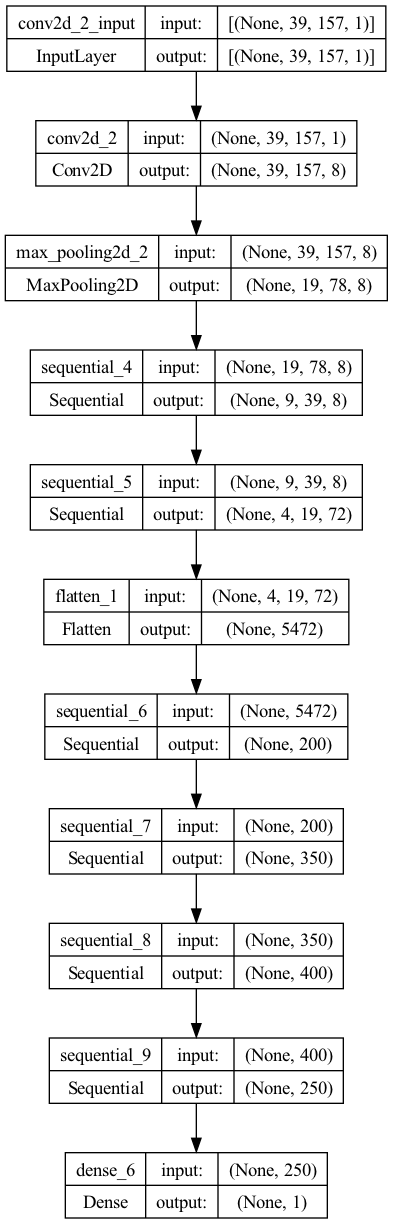

In [33]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='best_model.png', show_shapes=True, show_layer_names=True)

7. Get results 

In [27]:
results = model.evaluate(x_transformed, y_transformed)
# loss, acc, recall, precision, true_positives, true_negatives, false_positives, false_negatives 
results

469/469 [==============================] - 5s 10ms/step - loss: 0.2311 - accuracy: 1.0000 - recall: 0.0000e+00 - precision: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 14979.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00


[0.23107175529003143, 1.0, 0.0, 0.0, 0.0, 14979.0, 0.0, 0.0]